### Sentiment analysis using scikit-learn and NLTK for Yelp review classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
import os
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score

In [2]:
yelp = pd.read_csv(r'C:\Users\krish\Documents\yelp.csv')

In [3]:
yelp.shape

(10000, 10)

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,5,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny
cool,1.000000,-0.640771,-0.914031
useful,-0.640771,1.000000,0.897111
funny,-0.914031,0.897111,1.000000


#### Visualising these correlations using Seaborn’s heatmap

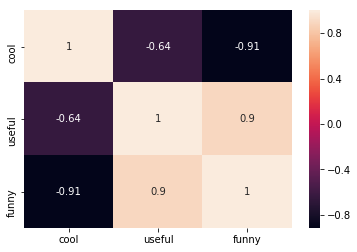

In [7]:
sns.heatmap(data=stars.corr(), annot=True)

Clearly, funny reviews are strongly correlated with useful reviews. 

In [8]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5) ]
#Considering Reviews with stars 1,2,4,5 excluding reviews with 3 stars. Transformed 2 to 1, 4 to 5

In [9]:
yelp_class.shape

(8539, 10)

Text(0.5,1,'Count of each star rating')

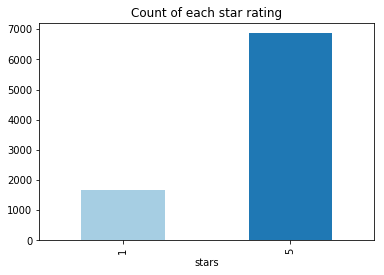

In [64]:
yelp_class['stars'].groupby(yelp_class['stars']).count().plot(kind="bar", sort_columns=True,color=[plt.cm.Paired(np.arange(len(yelp_class)))])
plt.title('Count of each star rating')

In [10]:
X = yelp_class['text']
Y = yelp_class['stars']    # Creating x,y variables for classification

### Text pre-processing

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
import string
def text_process(text):
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
text = "Hey there! When is the event? Today? "
print(text_process(text))                       

['Hey', 'event', 'Today']


In [19]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)              

In [20]:
len(bow_transformer.vocabulary_)

40526

In [23]:
review_22 = X[21]
review_22

"This place shouldn't even be reviewed - because it is the kind of place I want to keep for myself...  =)"

In [24]:
X = bow_transformer.transform(X)               #transform X dataframe into a sparse matrix. Using .transform() method on our bag-of-words transformed object

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
preds = nb.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 225  259]
 [  64 2014]]


             precision    recall  f1-score   support

          1       0.78      0.46      0.58       484
          5       0.89      0.97      0.93      2078

avg / total       0.87      0.87      0.86      2562



In [29]:
final_accuracy = round(accuracy_score(preds,y_test)*100,2)
print('The model achieved an accuracy of', final_accuracy, '%') #Naive Bayes

The model achieved an accuracy of 87.39 %


In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_logreg)           #Logistic regression

The model achieved an accuracy of 90.59


In [31]:
positive_review = yelp_class['text'][59]                        # LR more accurate than NB? Let's test 
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [32]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]                                     #Accurate prediction by NB

5

In [44]:
positive_review_transformedd = bow_transformer.transform([positive_review])
logreg.predict(positive_review_transformedd)[0]                                #Accurate prediction by LR

5

In [33]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [34]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]                                #Accurate prediction by NB

1

In [45]:
negative_review_transformed = bow_transformer.transform([negative_review])
logreg.predict(negative_review_transformed)[0]                            #Accurate prediction by LR

1

In [35]:
yelp_class['text'][140]

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [40]:
another_negative_review = yelp_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [41]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]                            #Inaccurate prediction by NB

5

In [46]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
logreg.predict(another_negative_review_transformed)[0]                        #Accurate prediction by LR***Best model

1

Initial dataset had a much higher number of 5-star reviews than 1-star reviews. 
So I transformed 4 to 5 stars and 2 to 1 star to collate categories and reduce bias.
The above inaccurate prediction shows that the NB model is more biased towards positive reviews compared to negative ones. Logistic regression model has better accuracy and predictions.

In [48]:
another_negative_review1 = yelp_class['text'][21]
another_negative_review1                                                    #Another review

"This place shouldn't even be reviewed - because it is the kind of place I want to keep for myself...  =)"

In [49]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review1])
logreg.predict(another_negative_review_transformed)[0]                      #Accurate prediction by LR

5

In [74]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The Random forest model achieved an accuracy of',acc_randomforest)                 #Lower accuracy of Random forest model

The Random forest model achieved an accuracy of 84.66


In [73]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The SVC model achieved an accuracy of',acc_svc)                          #Lower accuracy of Support vector machine model

The SVC model achieved an accuracy of 81.11


In [69]:
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import SGDClassifier
sgd_l2 = SGDClassifier(penalty='l2', alpha=0.001, loss= 'log').fit(X_train, y_train)
sgd_y_pred = sgd_l2.predict(X_test)

print('Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: {:.2f}'.format(sgd_l2.score(X_test, y_test)))

Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: 0.91


In [71]:
from sklearn.model_selection import GridSearchCV

parameters={'penalty' : ['l1', 'l2'], 'C' : [0.001, 0.01, 0.1, 1, 10]} 
clf_log=LogisticRegression() 
clf=GridSearchCV(clf_log,parameters) 
clf.fit(X_train,y_train)
clf.best_params_                                                     #Using grid search

{'C': 1, 'penalty': 'l2'}

In [72]:
logistic_l2 = LogisticRegression(penalty='l2', C=1).fit(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_logreg)                #same accuracy as our best logistic regression model

The model achieved an accuracy of 90.59
